# КИНОПОИСК: в каких жанрах предпочитают сниматься актеры?

In [1]:
from networkx.algorithms import bipartite
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import urllib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import LFR_benchmark_graph
# from community import community_louvain
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import asyn_lpa_communities
from networkx.algorithms.community import greedy_modularity_communities
import pandas as pd
from IPython.display import display, HTML, display_pretty
import os
%matplotlib inline

In [6]:
colnames = ['actor', 'genre', 'weight']
data = pd.read_csv('films_weighted_2.csv', names=colnames, delimiter = ";")

In [7]:
actors = data.actor.tolist()
genres = data.genre.tolist()

In [8]:
records = data.to_records(index=False)
edges = list(records) #tuple

In [9]:
edges[:5]

[('Тим Роббинс', 'драма', 1),
 ('Морган Фриман', 'драма', 7),
 ('Боб Гантон', 'драма', 2),
 ('Уильям Сэдлер', 'драма', 1),
 ('Клэнси Браун', 'драма', 1)]

Построим двудольный граф

In [10]:
B = nx.Graph()
B.add_nodes_from(actors, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(genres, bipartite=1)
B.add_weighted_edges_from(edges)

# Separate by group
#l, r = nx.bipartite.sets(B)
#pos = {}


#pos.update((node, (1, index)) for index, node in enumerate(l))
#pos.update((node, (2, index)) for index, node in enumerate(r))

#nx.draw(B, pos=pos)

C:\Users\leras\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


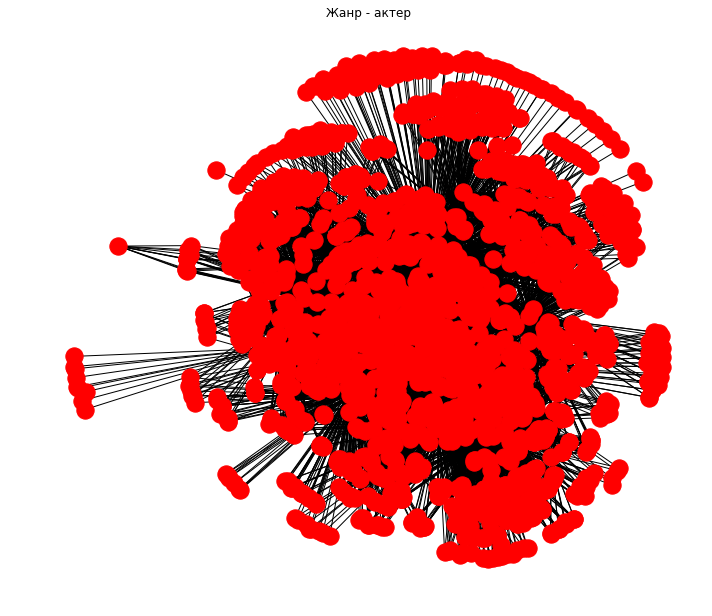

In [11]:
plt.figure(figsize = (10, 25))
plt.subplot(3, 1, 1)
nx.draw(B)
plt.title("Жанр - актер")
plt.tight_layout()

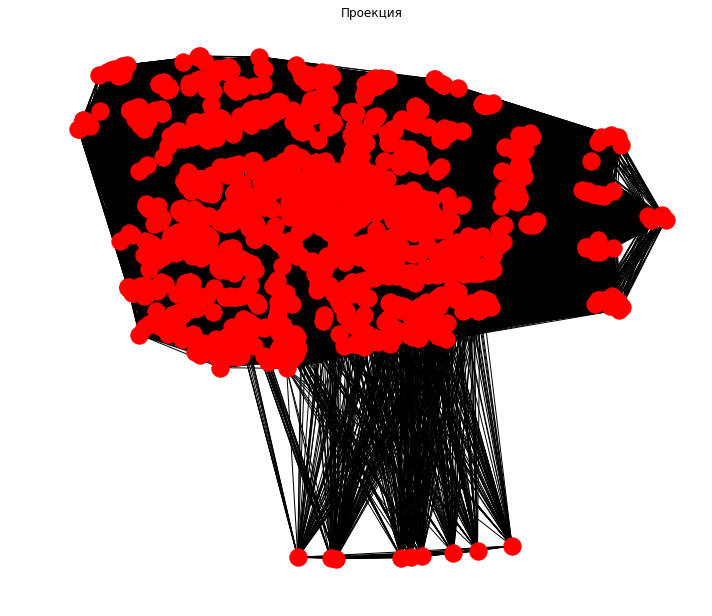

In [12]:
P1 = bipartite.overlap_weighted_projected_graph(B, actors)
plt.figure(figsize = (10, 25))
plt.subplot(3, 1, 1)
nx.draw(P1)
plt.title("Проекция")
plt.tight_layout()

In [13]:
W = data['weight'].astype(int)

Text(0.5, 1.0, 'Кинопоиск network')

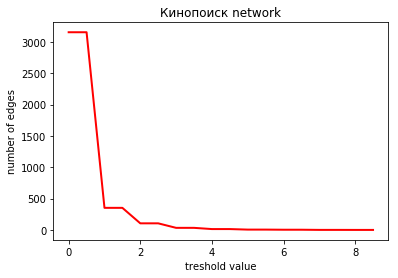

In [14]:
X = np.arange(0, 9, 0.5)
y = np.array([(W > x).sum() / 2 for x in X])

plt.plot(X, y, "r", lw = 2)
plt.ylabel("number of edges")
plt.xlabel("treshold value")
plt.title("Кинопоиск network")

In [16]:
tr = 2
deg_vec = np.array(W)
deg_vec[deg_vec < tr] = 0
deg_vec[deg_vec >= tr] = 1

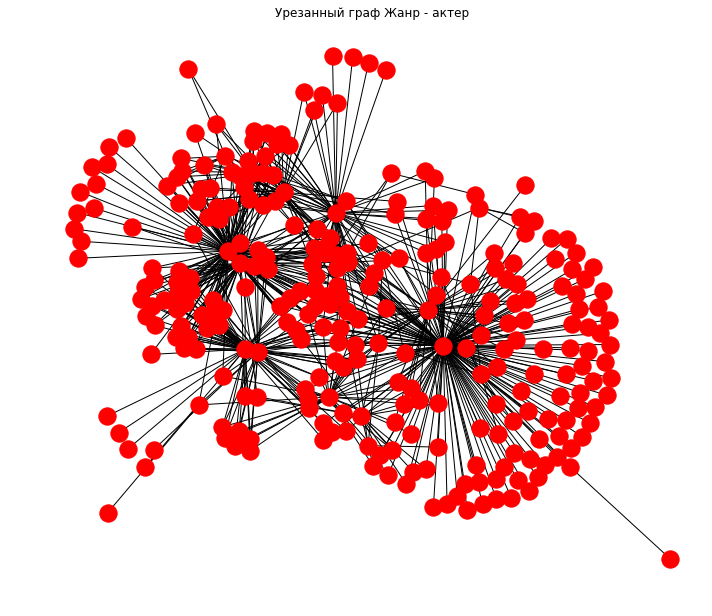

In [17]:
indexes = np.nonzero(deg_vec.ravel()) 
# print(indexes)

g_records = records[indexes]
g_actors = g_records.actor.tolist()
g_genres = g_records.genre.tolist()

# Построим новый граф
G = nx.Graph()
G.add_nodes_from(g_actors, bipartite=0) # Add the node attribute "bipartite"
G.add_nodes_from(g_genres, bipartite=1)
g_edges = list(g_records)


G.add_weighted_edges_from(g_edges)

plt.figure(figsize = (10, 25))
plt.subplot(3, 1, 1)
nx.draw(G)
plt.title("Урезанный граф Жанр - актер")
plt.tight_layout()

# print(g_records)

In [14]:
# T = nx.Graph()
# plt.figure(figsize=(10,10))
# nx.draw_networkx(T, 
#                  with_labels=False, 
#                  node_size=[10 * x for x in T.degree()],
#                  node_color = "darkblue",
#                  alpha = 0.5)
# plt.title("Цветной граф")

In [18]:
# Girvan Newman's community detection method
def greedy_modularity_communities(G):
    communities = community.greedy_modularity_communities(G)
    return sorted(sorted(c) for c in communities)

# Girvan Newman's community detection method
def detect_communities_girvan_newman(G):
    communities = community.girvan_newman(G)
    return sorted(sorted(c) for c in communities)

# Fast Greedy community detection method
def detect_communities_greedy(G):
    communities = greedy_modularity_communities(G)
    return sorted(map(sorted, communities))

# Label propagation community detection method
def detect_communities_label_propagation(G):
    communities = list()
    #for c in asyn_lpa_communities(G):
    for c in label_propagation_communities(G):
        communities.append(sorted(c))
    return sorted(communities)

In [19]:
# Plot graph with communities, receives a list of communities, where each community is a list of nodes (ints)
def show_communities(G, communities, name='title'):
    pos=nx.spring_layout(G)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure()
    plt.title(name, fontsize=20)
    aux = 0
    for community in communities:
        nx.draw_networkx_nodes(G, pos, community, node_size = 50, node_color = colors[aux])
        aux = aux + 1
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show(block=True)

In [20]:
G = max(nx.connected_component_subgraphs(G), key=len)

[['Chris Miller', 'Ё Оидзуми', 'Ёсито Ясухара', 'Адам Голдберг', 'Акихиро Мива', 'Алан Рикман', 'Алек Гиннесс', 'Аль Пачино', 'Аои Юки', 'Арнольд Шварценеггер', 'Барри Пеппер', 'Бен Аффлек', 'Бен Кингсли', 'Бен Мендельсон', 'Бенедикт Камбербэтч', 'Бернард Хилл', 'Берт Янг', 'Билл Мюррей', 'Билл Найи', 'Билл Пэкстон', 'Билли Бойд', 'Билли Ди Уильямс', 'Боб Гантон', 'Боб Питерсон', 'Бонни Хант', 'Брайан Кокс', 'Брайан Крэнстон', 'Брайан Хау', 'Брайс Гейзар', 'Брендан Глисон', 'Брэд Питт', 'Брэдли Пирс', 'Брэдли Уитфорд', 'Брюс Уиллис', 'Вера Фармига', 'Вигго Мортенсен', 'Вин Дизель', 'Винни Джонс', 'Виола Дэвис', 'Вуди Харрельсон', 'Вупи Голдберг', 'Гай Пирс', 'Гари Олдман', 'Дайан Китон', 'Дайан Крюгер', 'Даниэль Брюль', 'Деннис Куэйд', 'Дерек Джекоби', 'Дж.К. Симмонс', 'Джаред Лето', 'Джеймс Вудс', 'Джеймс Кромуэлл', 'Джеймс Марсден', 'Джеймс Ребхорн', 'Джеймс Хейден', 'Джеймс Эрл Джонс', 'Джейсон Стэйтем', 'Джейсон Шварцман', 'Джек Девенпорт', 'Джек Николсон', 'Джек Эйнджел', 'Джеки Э

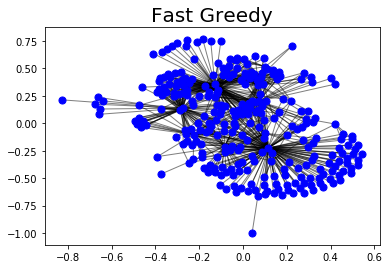

[['Chris Miller', 'Ё Оидзуми', 'Ёсито Ясухара', 'Акихиро Мива', 'Алан Рикман', 'Алек Гиннесс', 'Арнольд Шварценеггер', 'Бен Мендельсон', 'Бенедикт Камбербэтч', 'Бернард Хилл', 'Билл Мюррей', 'Билл Найи', 'Билл Пэкстон', 'Билли Бойд', 'Билли Ди Уильямс', 'Боб Питерсон', 'Бонни Хант', 'Брендан Глисон', 'Брэдли Пирс', 'Вигго Мортенсен', 'Вин Дизель', 'Винни Джонс', 'Гари Олдман', 'Деннис Куэйд', 'Дж.К. Симмонс', 'Джеймс Эрл Джонс', 'Джейсон Стэйтем', 'Джейсон Шварцман', 'Джек Девенпорт', 'Джек Эйнджел', 'Дженетт Голдстин', 'Джефф Бриджес', 'Джеффри Раш', 'Джим Каммингс', 'Джимон Хонсу', 'Джоан Кьюсак', 'Джон Кенни', 'Джон Литгоу', 'Джон Майкл Хиггинс', 'Джон Моррис', 'Джон Ратценбергер', 'Джон Рис-Дэвис', 'Джон Хёрд', 'Джона Хилл', 'Джонни Депп', 'Джош Гад', 'Доминик Монахэн', 'Дон Джонсон', 'Дон Риклз', 'Дэвид Праус', 'Дэниел Стерн', 'Дэниэл Мейс', 'Дэниэл Рэдклифф', 'Зои Салдана', 'Иен Макдермид', 'Итиро Нагаи', 'Иэн Маккеллен', 'Иэн Холм', 'Кевин МакНэлли', 'Кен Стотт', 'Кенни Бейкер',

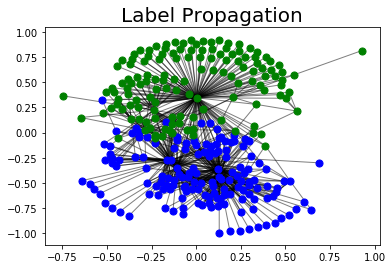

[['Chris Miller', 'Ё Оидзуми', 'Ёсито Ясухара', 'Адам Голдберг', 'Акихиро Мива', 'Алан Рикман', 'Алек Гиннесс', 'Аль Пачино', 'Аои Юки', 'Арнольд Шварценеггер', 'Барри Пеппер', 'Бен Аффлек', 'Бен Кингсли', 'Бен Мендельсон', 'Бенедикт Камбербэтч', 'Бернард Хилл', 'Берт Янг', 'Билл Мюррей', 'Билл Найи', 'Билл Пэкстон', 'Билли Бойд', 'Билли Ди Уильямс', 'Боб Гантон', 'Боб Питерсон', 'Бонни Хант', 'Брайан Кокс', 'Брайан Крэнстон', 'Брайан Хау', 'Брайс Гейзар', 'Брендан Глисон', 'Брэд Питт', 'Брэдли Пирс', 'Брэдли Уитфорд', 'Брюс Уиллис', 'Вера Фармига', 'Вигго Мортенсен', 'Вин Дизель', 'Винни Джонс', 'Виола Дэвис', 'Вуди Харрельсон', 'Вупи Голдберг', 'Гай Пирс', 'Гари Олдман', 'Дайан Китон', 'Дайан Крюгер', 'Даниэль Брюль', 'Деннис Куэйд', 'Дерек Джекоби', 'Дж.К. Симмонс', 'Джаред Лето', 'Джеймс Вудс', 'Джеймс Кромуэлл', 'Джеймс Марсден', 'Джеймс Ребхорн', 'Джеймс Хейден', 'Джеймс Эрл Джонс', 'Джейсон Стэйтем', 'Джейсон Шварцман', 'Джек Девенпорт', 'Джек Николсон', 'Джек Эйнджел', 'Джеки Э

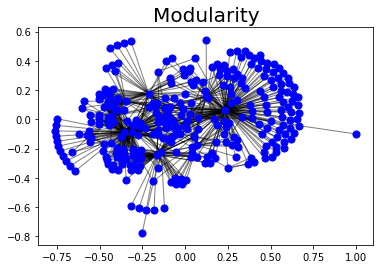

In [21]:
methods = {
#     'Louvain': detect_communities_louvain,
#     'Girvan Newman': detect_communities_girvan_newman,
    'Fast Greedy': detect_communities_greedy,
    'Label Propagation': detect_communities_label_propagation,
    'Modularity': greedy_modularity_communities
}

for method in methods.items():
    result = method[1](G)
    print(result)
    show_communities(G, result, name=method[0])